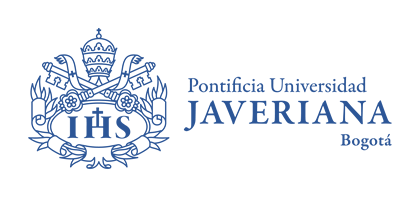

# Aprendizaje de Máquina - Proyecto

- Diana Chaparro
- Juan Sebastián Vargas Torres

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.neural_network import MLPClassifier
import sklearn.pipeline as skPipe
import pickle
pd.set_option('display.max_columns', None)
from sklearn.metrics import (
    confusion_matrix, f1_score, precision_score, recall_score, roc_curve, auc,accuracy_score
)

## Funciones Útiles

In [2]:
def  getLimitsAndMedian(attribute, n=1.5):

  # Cuartil 1
  q1 = attribute.quantile(0.25)
 
  # Cuartil 3
  q3 = attribute.quantile(0.75)

  med = attribute.median()
  
  # IQR
  iqr = q3-q1
  
  upper_bound = q3+(n*iqr)
  lower_bound = q1-(n*iqr)

  print("Q1: ",q1," Q3: ", q3," Median: ", med," IQR: ", iqr)
  return upper_bound, lower_bound, med

In [3]:
def print_stats(y_test, y_pred):
  """
  Prints the accuracy, precision, recall and F1-score stats for the given labels

  Args:
  - y_test, true labels
  - y_pred, predicted labels
  """
  print("Accuracy:", accuracy_score(y_test, y_pred))
  print("Precision:", precision_score(y_test, y_pred, average="weighted"))
  print("Recall:", recall_score(y_test, y_pred,average="weighted"))
  print("F1-Score:", f1_score(y_test, y_pred,average="weighted"))

In [4]:
def print_confusion_matrix(y_test, y_pred):
  """
  Draws a confusion matrix for the given labels

  Args:
  - y_test, true labels
  - y_pred, predicted labels
  """
  cm = confusion_matrix(y_test, y_pred)
  sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False)
  plt.title('Confusion Matrix')
  plt.xlabel('true label')
  plt.ylabel('predicted label')

In [5]:
def print_train_val_graph(model):
  """
  Draws a confusion matrix for the given labels

  Args:
  - y_test, true labels
  - y_pred, predicted labels
  """
  plt.plot(model.loss_curve_)
  plt.plot( 1 - np.array(model.validation_scores_))
  plt.legend(['Train','Validation'])

## Lectura de datos

In [36]:
dino_data = pd.read_csv("/content/dino_data.csv")

In [7]:
dino_data

,obstacle_width,obstacle_height,dino_position_y,distanceFromNextObstacle,speed,label
0,1100,300,276,1020.282314,20,Jump
1,1080,300,245,1001.511358,20,Jump
2,1060,300,217,983.508515,20,Jump
3,1040,300,192,966.055899,20,Jump
4,1020,300,170,948.946785,20,Jump
...,...,...,...,...,...,...
24871,400,320,310,320.156212,50,Run
24872,350,320,310,270.185122,50,Run
24873,300,320,310,220.227155,50,Run
24874,250,320,310,170.293864,50,Run


In [8]:
dino_data.isna().sum()

obstacle_width              0
obstacle_height             0
dino_position_y             0
distanceFromNextObstacle    0
speed                       0
label                       0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe2642bea50>,
      dtype=object)

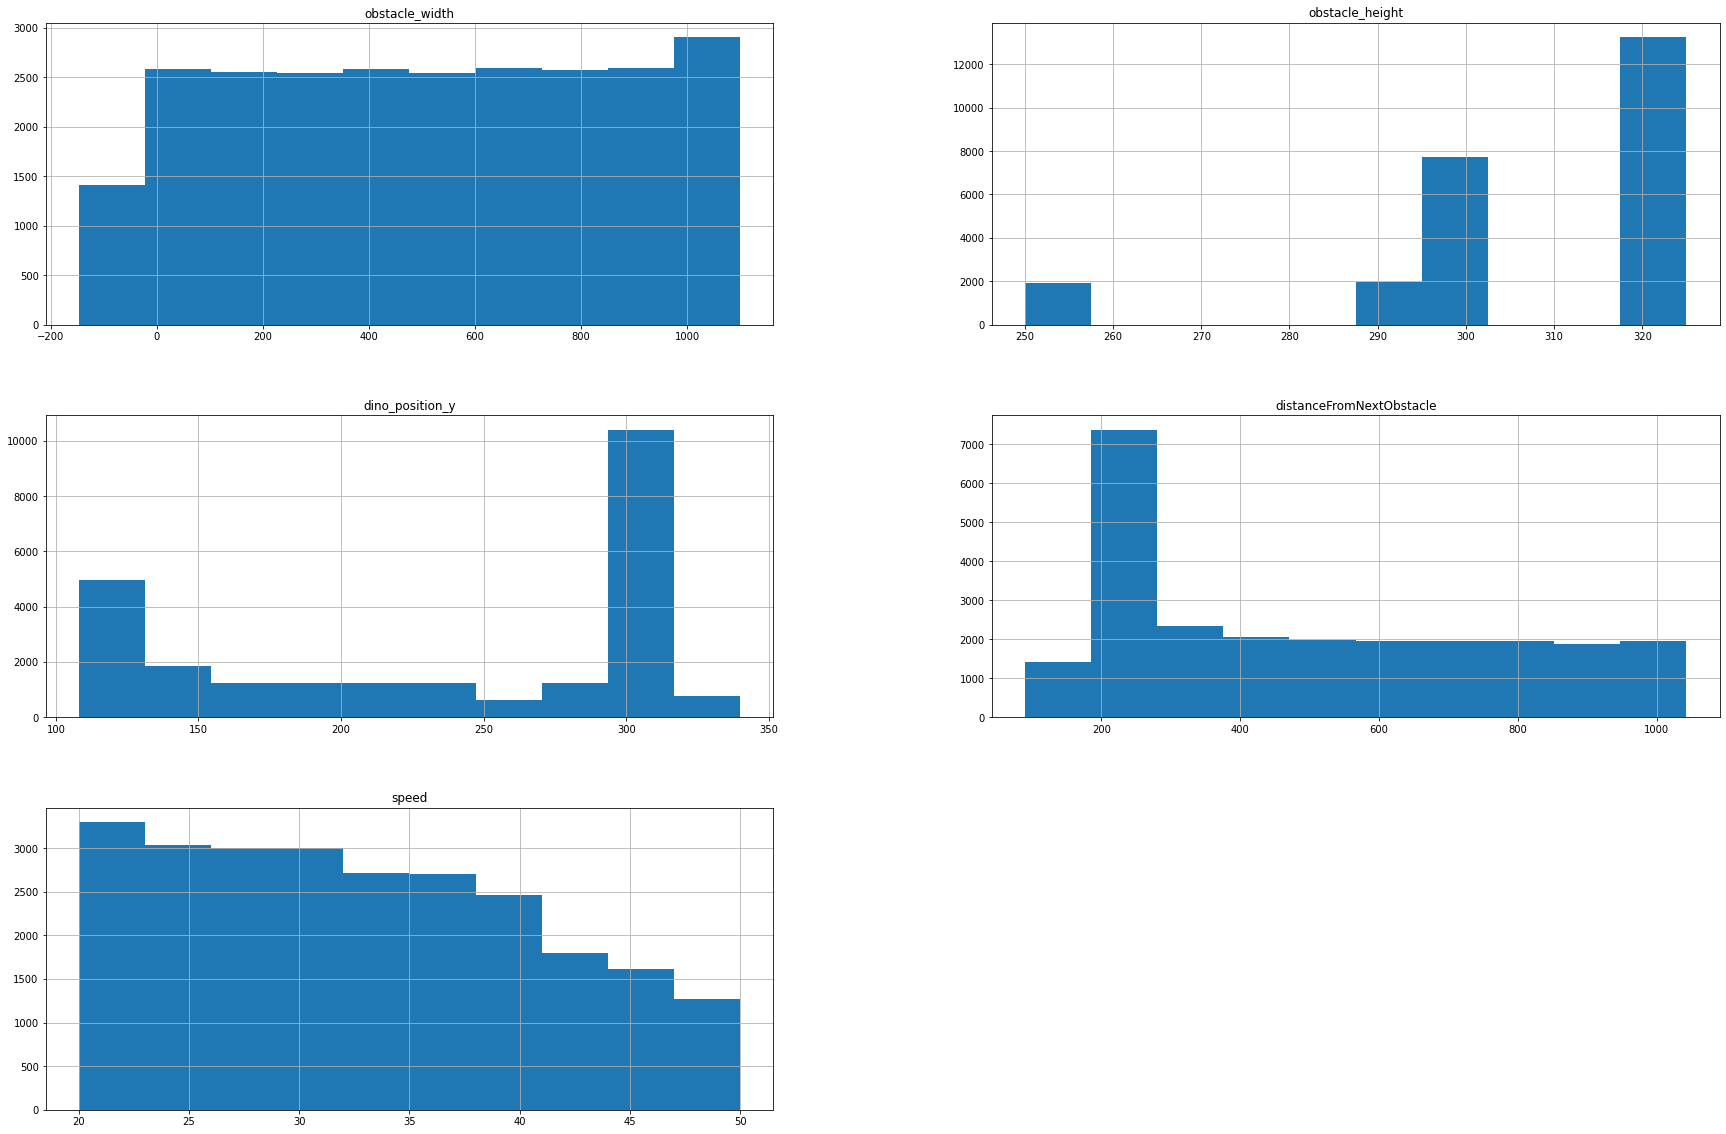

In [9]:
dino_data.hist(figsize=(30, 20))

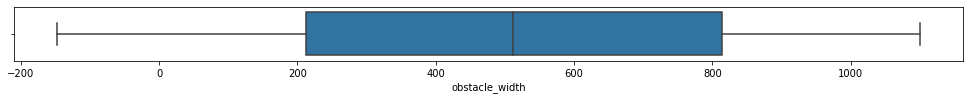

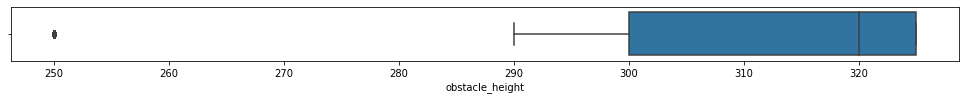

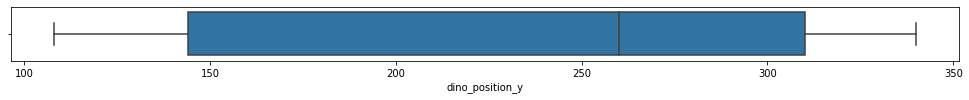

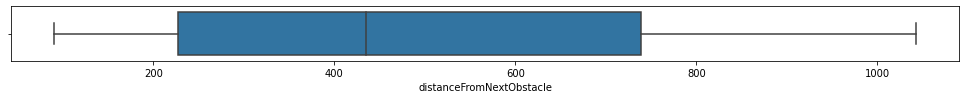

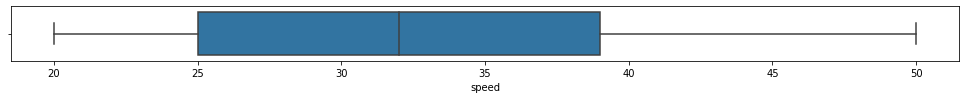

In [10]:
df_numeric=dino_data.select_dtypes(exclude=['object'])
for column in df_numeric:
    plt.figure(figsize=(17,1))
    sns.boxplot(data=df_numeric, x=column)

In [11]:
corr = dino_data[dino_data.columns[:-1]].corr()
corr.style.background_gradient(cmap='coolwarm')

,obstacle_width,obstacle_height,dino_position_y,distanceFromNextObstacle,speed
obstacle_width,1.000000,0.005744,0.517622,0.967790,-0.013272
obstacle_height,0.005744,1.000000,-0.168076,0.028914,0.050806
dino_position_y,0.517622,-0.168076,1.000000,0.399979,-0.234387
distanceFromNextObstacle,0.967790,0.028914,0.399979,1.000000,0.003952
speed,-0.013272,0.050806,-0.234387,0.003952,1.000000


In [12]:
dino_data.drop(columns=["obstacle_width"],inplace=True)

In [13]:
dino_data["label"].value_counts()

Jump    13694
Run     10398
Duck      784
Name: label, dtype: int64

In [14]:
raplace_data= {"Jump":0,"Run":1,"Duck":2}
dino_data["label"].replace(raplace_data, inplace=True)

In [15]:
X = dino_data[dino_data.columns[:-1]]
Y= dino_data["label"]

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [17]:
oversample = SMOTE()

In [18]:
X_train=np.array(X_train)

In [19]:
X_train, Y_train = oversample.fit_resample(X_train, Y_train)

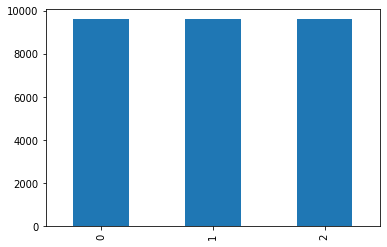

In [20]:
data= {"y": Y_train}
df_y=pd.DataFrame(data)
df_y["y"].value_counts().plot.bar()

### Entrenamiento

In [21]:
standarizer = StandardScaler()
networkModel = MLPClassifier()

In [22]:
pipe0 = skPipe.Pipeline([('standarizer', standarizer), ('network', networkModel)])

In [23]:
params_exp_1={
        "network__hidden_layer_sizes": (4,2),
        "network__solver": "sgd",
        "network__batch_size":32,
        "network__early_stopping":True,
        "network__validation_fraction":0.2,
        "network__n_iter_no_change":10,
        "network__learning_rate_init": 0.001,
        "network__max_iter":100000
}

In [24]:
pipe0.set_params(**params_exp_1)

Pipeline(steps=[('standarizer', StandardScaler()),
                ('network',
                 MLPClassifier(batch_size=32, early_stopping=True,
                               hidden_layer_sizes=(4, 2), max_iter=100000,
                               solver='sgd', validation_fraction=0.2))])

In [25]:
pipe0.fit(X_train,Y_train)

Pipeline(steps=[('standarizer', StandardScaler()),
                ('network',
                 MLPClassifier(batch_size=32, early_stopping=True,
                               hidden_layer_sizes=(4, 2), max_iter=100000,
                               solver='sgd', validation_fraction=0.2))])

In [26]:
Y_predict_0 = pipe0.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [27]:
pipe0.predict([[300,276,1020.282314,20]])

array([0])

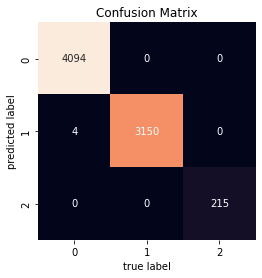

In [28]:
print_confusion_matrix(Y_test, Y_predict_0)

In [29]:
print_stats(Y_test, Y_predict_0)

Accuracy: 0.9994640225110545
Precision: 0.9994647022542237
Recall: 0.9994640225110545
F1-Score: 0.9994640617007949


In [30]:
obj_bytes=pickle.dumps(pipe0)

In [31]:
type(obj_bytes)

bytes

In [32]:
file = open('dino_model', 'wb')

# dump information to that file
pickle.dump(obj_bytes, file)

In [34]:
# open a file, where you stored the pickled data
file = open('dino_model', 'rb')

# dump information to that file
model_data = pickle.load(file)

In [35]:
my_obj=pickle.loads(model_data)
print(my_obj)

Pipeline(steps=[('standarizer', StandardScaler()),
                ('network',
                 MLPClassifier(batch_size=32, early_stopping=True,
                               hidden_layer_sizes=(4, 2), max_iter=100000,
                               solver='sgd', validation_fraction=0.2))])
